# **<center><font color="orange">Project Akhir EDA </font></center>**
# **<center><font color="orange"> Analisis Tweet  Terkait Film KKN di Desa Penari</font></center>**

Film KKN di Desa Penari merupakan salah satu film horror yang diangkat dari salah satu thread di twitter karya SimpleMan. Thread tersebut digadang-gadang merupakan kisah nyata seorang mahasiswa yang melakukan KKN di salah satu desa terpencil yang menyimpan banyak unsur mistis. Thread itu kemudian menjadi viral karena diretweet sebanyak 74 ribu kali dan disukai hampir 200 ribu kali.Popularitas thread tersebut terus meningkat hingga akhirnya menarik perhatian produser-produser untuk menjadikannya film dan Manoj Punjabi lah yang akhirnya menjadikannya film. Film ini meledak dan  kini telah mencapai 9 juta penonton sejak ditayangkan pada 30 April 2022. Banyak sekali data yang bisa dikupas dan dianalisis lebih dalam terkait keberhasilan film tersebut. Hal ini jugalah yang melatarbelakangi tema project ini.

## Import Package and API Key

In [1]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-12 14:23:53--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-12 14:23:53 (64.6 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2022-06-12 14:23:53--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221233 (21

In [2]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-12 14:25:47--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8834 (8.6K) [text/plain]
Saving to: ‘taudataEDA02CTA.py’

taudataEDA02CTA.py  100%[===================>]   8.63K  --.-KB/s    in 0s      

2022-06-12 14:25:48 (62.2 MB/s) - ‘taudataEDA02CTA.py’ saved [8834/8834]

mkdir: cannot create directory ‘data’: File exists
--2022-06-12 14:25:48--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP requ

In [3]:
import taudataEDA02CTA as tau1
import json, urllib.request, requests, tweepy
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
"Done"


'Done'

In [4]:
Ck = 'nLp9T5Ko4mbZPjaxYWguWQ53G' # consumer_key
Cs = 'pN7tH6fD0gfL0wM4vRNhkAulx51ya8JIYqv62Gki1KQAQ0NOUB' # consumer_secret
At = '1319600528020525056-mcxrKOGqa8XajD7pQLCFAIZzkaN6uz' # access_token
As = '83AAZzCaVMPlzGM0B5wt0qCLEEDk1Oa7lZBVwYWBlf2kT' # access_secret
Bt = ""

In [5]:
auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "Poi" you are now connected to twitter server


## **KKN Di Desa Penari Tweet Analysis**

Akan diambil 1000 tweets terkini terkait KKN di Desa Penari lalu akan disimpan dalam bentuk file json.

In [6]:
qry = 'KKN Desa Penari'
N = 1000 # jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)
    
"Done"

1000it [00:17, 57.54it/s]


'Done'

In [7]:
T[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 12 14:21:33 +0000 2022',
 'display_text_range': [0, 67],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/4ikVepI99f',
    'expanded_url': 'https://twitter.com/jijiabaobei/status/1535892599520710656/photo/1',
    'id': 1535892581816537090,
    'id_str': '1535892581816537090',
    'indices': [44, 67],
    'media_url': 'http://pbs.twimg.com/media/FVCWKmhVEAIWJsh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/FVCWKmhVEAIWJsh.jpg',
    'sizes': {'large': {'h': 548, 'resize': 'fit', 'w': 548},
     'medium': {'h': 548, 'resize': 'fit', 'w': 548},
     'small': {'h': 548, 'resize': 'fit', 'w': 548},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 1535892599520710656,
    'source_status_id_str': '1535892599520710656',
    'source_user_id': 938318820124499968,
    'source_user_id_str': '938318820124499968',
    'type': 'photo',
    'url': 'https://t.co/4ikVep

In [8]:
# T bukan sekedar list of tweets 
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 1000 tweets


In [9]:
# Contoh mengakses data spesifik pada tweet yang pertama:
print('tweet pertama oleh "{}" : "{}"'.format(tweet[0]['user']['screen_name'],tweet[0]['full_text']))

tweet pertama oleh "izzazryn" : "RT @jijiabaobei: konsep dia KKN Desa Penari https://t.co/4ikVepI99f"


In [10]:
import json 
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [11]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [12]:
# Me-load kembali jika (misal) analisa ingin dilakukan di lain waktu
#Sengaja nama variabelnya saya bedakan (T2)
fileName = "TweetsKKN.json"
T2 = saveTweets(tweet, file=fileName)
#print('tweet pertama oleh "{}" : "{}"'.format(T2[0]['user']['screen_name'],T2[0]['full_text']))

In [13]:
# Mari kita coba #1
topic = 'KKN Desa Penari'
T = api.search_tweets(q=topic, lang='id', tweet_mode = 'extended')
tweet = [t._json for t in T]
isiTweet = [t['full_text'] for t in tweet]
isiTweet

['RT @jijiabaobei: konsep dia KKN Desa Penari https://t.co/4ikVepI99f',
 'RT @SimpleM81378523: KKN di Desa penari-\n\nHorror Story-\n\n@bacahorror  #bacahorror https://t.co/QM0zY8m9rj',
 'kkn di desa penari https://t.co/JHehAVlWmY',
 'Jd penisirin ini dimana sih aslinya kkn desa penari??\nCari di youtube banyak bener spekulasiny',
 'tehe! cw // crossover kkn di desa penari \n\nbaju yae miko mirip badawuhi gak sih guys?',
 'RT @SimpleM81378523: KKN di Desa penari-\n\nHorror Story-\n\n@bacahorror  #bacahorror https://t.co/QM0zY8m9rj',
 'RT @iniaku_92: Yang mau nonton kkn desa penari 2022 di telegram nih,kemarin nemu\nhttps://t.co/9Kh72Nk2EQ https://t.co/Rm7Nwi4XTx',
 '@pislapisd Masuk kkn desa penari jadi susah nangkepnya 🙏🙏🙏',
 '@jangancariguaya @memefess Ini bahas kkn desa penari med?',
 'Fx masih ada wahana kkn desa penari ga sih?',
 'KKN Desa Penari: Kisah Mistis Pengingat untuk Selalu\xa0Hormat https://t.co/VNLPWN1hiK',
 'Kkn di desa penari https://t.co/FllZpF6WSR',
 'RT @SimpleM813

## **Analisis Perbandingan Popularitas KKN di Desa Penari di 3 Tempat**

Telah dipilih 3 tempat untuk melakukan analisis terkait popularitas film KKN di Desa Penari. Tempat-tempat yang dipilih juga memiliki alasan tertentu. Tempat pertama ialah Depok, Jawa barat, yaitu sebagai tempat kita malakukan pembelajaran ini. Tempat kedua ialah Yogyakarta sebagai lokasi shooting film KKN di Desa Penari. Tempat ketiga ialah Kota Banyuwangi yang digadang-gadang sebagai lokasi asli kejadian film tersebut. 

### Kota Banyuwangi

Akan diambil sebanyak maksimal 1000 data sejauh 200 km dari titik tempat "Banyuwangi". Kemudian akan dicari beberapa hastag yang terkait dengan KKN di Desa Penari lalu akan divisualisasikan dan dilihat hastag apa saja yang ramai di sekitar lokasi tersebut.

In [14]:
alamat = "Banyuwangi"
lat = '-8.210290'
lon = '114.373528'

"Done"

'Done'

In [15]:
radius = '200km'
Geo = ','.join([lat, lon, radius])
N = 1000
qry = 'KKN Desa Penari'
L = []
for tweet_ in tweepy.Cursor(api.search_tweets, q=qry, geocode=Geo).items(N):
    L.append(tweet_)
    print([tweet_.created_at, tweet_.text.encode('utf-8'), tweet_.user.id, tweet_.geo])

[datetime.datetime(2022, 6, 12, 7, 38, 17, tzinfo=datetime.timezone.utc), b'Dengerin ok! Nct u random bgt kepikiran kkn desa penari \xf0\x9f\x98\xad\xf0\x9f\x98\xad\xf0\x9f\x98\xad', 1308740740822917125, None]
[datetime.datetime(2022, 6, 12, 7, 14, 18, tzinfo=datetime.timezone.utc), b'Tissa Biani Sementara Tolak Film Horor Setelah \xe2\x80\x9cKKN: di Desa Penari\xe2\x80\x9d https://t.co/etoAOIW7Xn', 911001506, None]
[datetime.datetime(2022, 6, 12, 5, 19, 56, tzinfo=datetime.timezone.utc), b'Tissa Biani alami gangguan dari makhluk astral saat syuting KKN di Desa Penari, langsung ogah main film horor?\xe2\x80\xa6 https://t.co/poHyhiv8eE', 1435481198218805249, None]
[datetime.datetime(2022, 6, 12, 4, 49, 39, tzinfo=datetime.timezone.utc), b'Di balik layar kesuksesan film KKN di Desa Penari, Tissa Biani ungkap kejadian mistis yang terjadi.\xe2\x80\xa6 https://t.co/CrTZ6tDqne', 1435481198218805249, None]
[datetime.datetime(2022, 6, 11, 15, 15, 11, tzinfo=datetime.timezone.utc), b'Penari di 

In [16]:
tweetB = [t._json for t in L]
print(' Berhasil mendapatkan {} tweets'.format(len(tweetB)))
print('tweet pertama oleh "{}" : "{}"'.format(tweetB[0]['user']['screen_name'],tweetB[0]['text']))

 Berhasil mendapatkan 49 tweets
tweet pertama oleh "lionanbear" : "Dengerin ok! Nct u random bgt kepikiran kkn desa penari 😭😭😭"


In [17]:
# Menyimpan hasil crawling twitter
fileNameB = 'TweetsB.json'
saveTweets(tweetB, file=fileNameB)
print('Saved to '+fileNameB)
B = [t['text'] for t in tweetB]
B[:5] # 5 tweet pertama

Saved to TweetsB.json


['Dengerin ok! Nct u random bgt kepikiran kkn desa penari 😭😭😭',
 'Tissa Biani Sementara Tolak Film Horor Setelah “KKN: di Desa Penari” https://t.co/etoAOIW7Xn',
 'Tissa Biani alami gangguan dari makhluk astral saat syuting KKN di Desa Penari, langsung ogah main film horor?… https://t.co/poHyhiv8eE',
 'Di balik layar kesuksesan film KKN di Desa Penari, Tissa Biani ungkap kejadian mistis yang terjadi.… https://t.co/CrTZ6tDqne',
 'Penari di Desa KKN.']

In [ ]:
import re
#'idx','btc','bnb','jihoon','shemalejogjakarta','shemalejogja','shemalefantasy','ladyboyjogja', 'issf'
HTfilters = set(['idx','btc','bnb','jihoon','shemalejogjakarta','shemalejogja','shemalefantasy','ladyboyjogja', 'issf'])
# modifikasi HTfilters sesuai data kamu
HT = {'hashtags':[]}
count = 0
getHashTags = re.compile(r"#(\w+)")
for i, d in tqdm(enumerate(B)):
    hashtags = re.findall(getHashTags, d)
    if hashtags:
        TG = []
        for tag in hashtags:
            dTag = str(tag).strip().lower()
            if len(dTag)>2:
                add = True
                for f in HTfilters:
                    if f in dTag:
                        add=False; break
                if add:
                    TG.append('#'+dTag); count += 1
            HT['hashtags'].append(TG)
print('Found {} number of hashtags'.format(count))

54it [00:00, 149106.26it/s]

Found 3 number of hashtags


#### Grafik Kota Banyuwangi

Dari olah data di atas didapatkan 54 tweets terkait KKN di Desa Penari dan 3 hastag popular dari tweets tersebut. Berikut adalah visualisasinya :

100%|██████████| 3/3 [00:00<00:00, 23003.50it/s]


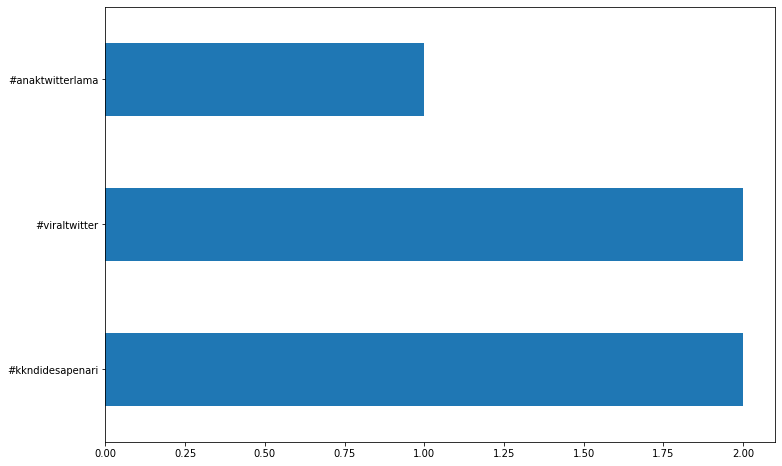

In [ ]:
N = 50 # Number of top frequent hashtags to be plotted

dtHT = [x for t in tqdm(HT['hashtags']) for x in t] # any(h not in x for h in HTfilters)
dtHT = pd.Series(dtHT)
dtHT = dtHT.value_counts()
dtHT = dtHT.sort_index()
dtHT = dtHT.sort_values(ascending = False) 
dtHT.to_csv('hashTags_2021.csv', encoding='utf8')
dtHT = dtHT.iloc[:N]

p = dtHT.plot(kind='barh', figsize=(12,8), legend = False)

### Kota Depok


Akan diambil sebanyak maksimal 1000 data sejauh 200 km dari titik tempat "Depok". Kemudian akan dicari beberapa hastag yang terkait dengan KKN di Desa Penari lalu akan divisualisasikan dan dilihat hastag apa saja yang ramai di sekitar lokasi tersebut.

In [18]:
alamat = "Depok"
lat = '-6.402484'
lon = '106.794243'

"Done"

'Done'

In [19]:
radius = '200km'
Geo = ','.join([lat, lon, radius])
N = 1000
qry = 'KKN Desa Penari'
H = []
for tweet_ in tweepy.Cursor(api.search_tweets, q=qry, geocode=Geo).items(N):
    H.append(tweet_)
    print([tweet_.created_at, tweet_.text.encode('utf-8'), tweet_.user.id, tweet_.geo])

[datetime.datetime(2022, 6, 12, 12, 53, 49, tzinfo=datetime.timezone.utc), b'@kpertiwi29 @PNS_Ababil @OmbudsmanRI137 @birokratmenulis Begitulah nasib pns/bumn di negeri wakanda, netralitas han\xe2\x80\xa6 https://t.co/rGjfFXPVBg', 182304960, None]
[datetime.datetime(2022, 6, 12, 12, 4, 12, tzinfo=datetime.timezone.utc), b'@bicaraboxoffice 1 Kukira Kau Rumah\n2 KKN di Desa Penari\n3 Kuntilanak 3\n4 The Doll 3\n5 Ngeri Ngeri Sedap', 1037182290332446723, None]
[datetime.datetime(2022, 6, 12, 10, 32, 23, tzinfo=datetime.timezone.utc), b'@javvatulen @jogjamnfs Efek dari film KKN Desa Penari jadi rame dan dinaikin kayaknya\n\naku sblm kesono ngecek di go\xe2\x80\xa6 https://t.co/NCUiy80V3y', 1301767951, None]
[datetime.datetime(2022, 6, 12, 8, 41, 46, tzinfo=datetime.timezone.utc), b'Berangkat dari euforia kkn desa penari, sekarang banyak berseliweran thread\xc2\xb2 horror di twitter.', 3085126831, None]
[datetime.datetime(2022, 6, 12, 8, 5, 4, tzinfo=datetime.timezone.utc), b'@Raff03786426 

In [20]:
tweetD = [t._json for t in H]
print(' Berhasil mendapatkan {} tweets'.format(len(tweetD)))
print('tweet pertama oleh "{}" : "{}"'.format(tweetD[0]['user']['screen_name'],tweetD[0]['text']))

 Berhasil mendapatkan 212 tweets
tweet pertama oleh "RezhaChaniago" : "@kpertiwi29 @PNS_Ababil @OmbudsmanRI137 @birokratmenulis Begitulah nasib pns/bumn di negeri wakanda, netralitas han… https://t.co/rGjfFXPVBg"


In [21]:
# Menyimpan hasil crawling twitter
fileNameD = 'TweetsD.json'
saveTweets(tweetD, file=fileNameD)
print('Saved to '+fileNameD)
D = [t['text'] for t in tweetD]
D[:5] # 5 tweet pertama

Saved to TweetsD.json


['@kpertiwi29 @PNS_Ababil @OmbudsmanRI137 @birokratmenulis Begitulah nasib pns/bumn di negeri wakanda, netralitas han… https://t.co/rGjfFXPVBg',
 '@bicaraboxoffice 1 Kukira Kau Rumah\n2 KKN di Desa Penari\n3 Kuntilanak 3\n4 The Doll 3\n5 Ngeri Ngeri Sedap',
 '@javvatulen @jogjamnfs Efek dari film KKN Desa Penari jadi rame dan dinaikin kayaknya\n\naku sblm kesono ngecek di go… https://t.co/NCUiy80V3y',
 'Berangkat dari euforia kkn desa penari, sekarang banyak berseliweran thread² horror di twitter.',
 '@Raff03786426 The doll 3, kkn di desa penari']

In [ ]:
import re

HTfilters = set(['idx','btc','bnb','jihoon','shemalejogjakarta','shemalejogja','shemalefantasy','ladyboyjogja', 'issf','menjadilebih','asetmasadepan','jokowikejarsetoran','tempoindonesiana','idcorner','carlifeinsurance','semarang','kofindo'])
# modifikasi HTfilters sesuai data kamu
HT = {'hashtags':[]}
count = 0
getHashTags = re.compile(r"#(\w+)")
for i, d in tqdm(enumerate(D)):
    hashtags = re.findall(getHashTags, d)
    if hashtags:
        TG = []
        for tag in hashtags:
            dTag = str(tag).strip().lower()
            if len(dTag)>2:
                add = True
                for f in HTfilters:
                    if f in dTag:
                        add=False; break
                if add:
                    TG.append('#'+dTag); count += 1
            HT['hashtags'].append(TG)
print('Found {} number of hashtags'.format(count))

219it [00:00, 60996.92it/s]

Found 10 number of hashtags


#### Grafik Kota Depok

Dari olah data di atas didapatkan 243 tweets terkait KKN di Desa Penari dan didapatkan 20 hastag populer. Berikut adalah visualisasinya :

100%|██████████| 25/25 [00:00<00:00, 178329.25it/s]


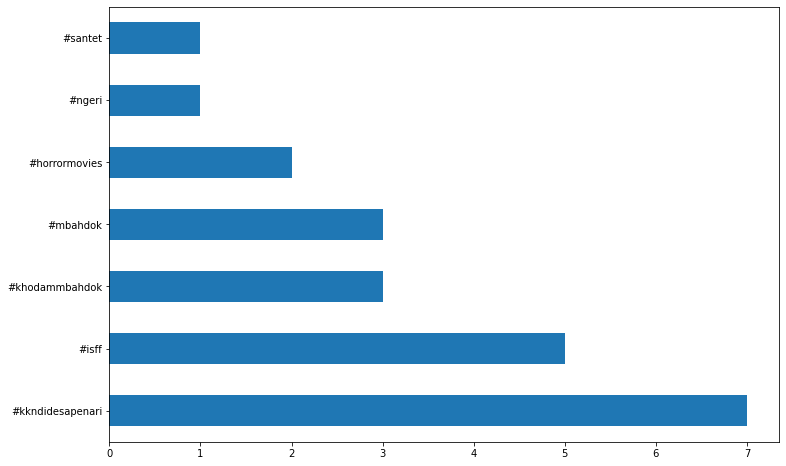

In [ ]:
N = 50 # Number of top frequent hashtags to be plotted

dtHT = [x for t in tqdm(HT['hashtags']) for x in t] # any(h not in x for h in HTfilters)
dtHT = pd.Series(dtHT)
dtHT = dtHT.value_counts()
dtHT = dtHT.sort_index()
dtHT = dtHT.sort_values(ascending = False) 
dtHT.to_csv('hashTags_2021.csv', encoding='utf8')
dtHT = dtHT.iloc[:N]

p = dtHT.plot(kind='barh', figsize=(12,8), legend = False)

### Kota Yogyakarta

Akan diambil sebanyak maksimal 1000 data sejauh 200 km dari titik tempat "Yogyakarta". Kemudian akan dicari beberapa hastag yang terkait dengan KKN di Desa Penari lalu akan divisualisasikan dan dilihat hastag apa saja yang ramai di sekitar lokasi tersebut. 

In [22]:
alamat = "Yogyakarya"
lat = '-7.795580'
lon = '110.369492'
"Done"

'Done'

In [23]:
radius = '200km'
Geo = ','.join([lat, lon, radius])
qry = 'KKN Desa Penari'
N = 1000
R = []
for tweet_ in tweepy.Cursor(api.search_tweets, q=qry, geocode=Geo).items(N):
    R.append(tweet_)
    print([tweet_.created_at, tweet_.text.encode('utf-8'), tweet_.user.id, tweet_.geo])

[datetime.datetime(2022, 6, 12, 10, 32, 23, tzinfo=datetime.timezone.utc), b'@javvatulen @jogjamnfs Efek dari film KKN Desa Penari jadi rame dan dinaikin kayaknya\n\naku sblm kesono ngecek di go\xe2\x80\xa6 https://t.co/NCUiy80V3y', 1301767951, None]
[datetime.datetime(2022, 6, 12, 8, 41, 46, tzinfo=datetime.timezone.utc), b'Berangkat dari euforia kkn desa penari, sekarang banyak berseliweran thread\xc2\xb2 horror di twitter.', 3085126831, None]
[datetime.datetime(2022, 6, 12, 8, 5, 4, tzinfo=datetime.timezone.utc), b'@Raff03786426 The doll 3, kkn di desa penari', 1123033024877064194, None]
[datetime.datetime(2022, 6, 12, 7, 25, 10, tzinfo=datetime.timezone.utc), b'Ada yang belum nonton KKN di desa penari Lurr', 1092717695802339328, None]
[datetime.datetime(2022, 6, 12, 4, 37, 18, tzinfo=datetime.timezone.utc), b'@moviemenfes kkn di desa penari', 1302918191681736705, None]
[datetime.datetime(2022, 6, 12, 3, 18, 54, tzinfo=datetime.timezone.utc), b'Pasca KKN Di Desa Penari, Tissa Biani 

In [24]:
tweetY = [t._json for t in R]
print(' Berhasil mendapatkan {} tweets'.format(len(tweetY)))
print('tweet pertama oleh "{}" : "{}"'.format(tweetY[0]['user']['screen_name'],tweetY[0]['text']))

 Berhasil mendapatkan 104 tweets
tweet pertama oleh "uptukangdesain" : "@javvatulen @jogjamnfs Efek dari film KKN Desa Penari jadi rame dan dinaikin kayaknya

aku sblm kesono ngecek di go… https://t.co/NCUiy80V3y"


In [26]:
# Menyimpan hasil crawling twitter
fileNameY = 'TweetsY.json'
saveTweets(tweetY, file=fileNameY)
print('Saved to '+fileNameY)
Y = [t['text'] for t in tweetY]
Y[:5] # 5 tweet pertama

Saved to TweetsY.json


['@javvatulen @jogjamnfs Efek dari film KKN Desa Penari jadi rame dan dinaikin kayaknya\n\naku sblm kesono ngecek di go… https://t.co/NCUiy80V3y',
 'Berangkat dari euforia kkn desa penari, sekarang banyak berseliweran thread² horror di twitter.',
 '@Raff03786426 The doll 3, kkn di desa penari',
 'Ada yang belum nonton KKN di desa penari Lurr',
 '@moviemenfes kkn di desa penari']

In [ ]:
import re

HTfilters = set(['shemalejogjakarta','shemalejogja','shemalefantasy','ladyboyjogja','kofindo','asetmasadepan','idcorner','semarang'])
# modifikasi HTfilters sesuai data kamu
HT = {'hashtags':[]}
count = 0
getHashTags = re.compile(r"#(\w+)")
for i, d in tqdm(enumerate(Y)):
    hashtags = re.findall(getHashTags, d)
    if hashtags:
        TG = []
        for tag in hashtags:
            dTag = str(tag).strip().lower()
            if len(dTag)>2:
                add = True
                for f in HTfilters:
                    if f in dTag:
                        add=False; break
                if add:
                    TG.append('#'+dTag); count += 1
            HT['hashtags'].append(TG)
print('Found {} number of hashtags'.format(count))

103it [00:00, 230407.10it/s]

Found 6 number of hashtags


#### Graph Kota Yogyakarta

Dari olah data di atas didapatkan 118 tweets terkait KKN di Desa Penari dan didapatkan 11 hastag populer. Berikut adalah visualisasinya :

100%|██████████| 11/11 [00:00<00:00, 21000.16it/s]


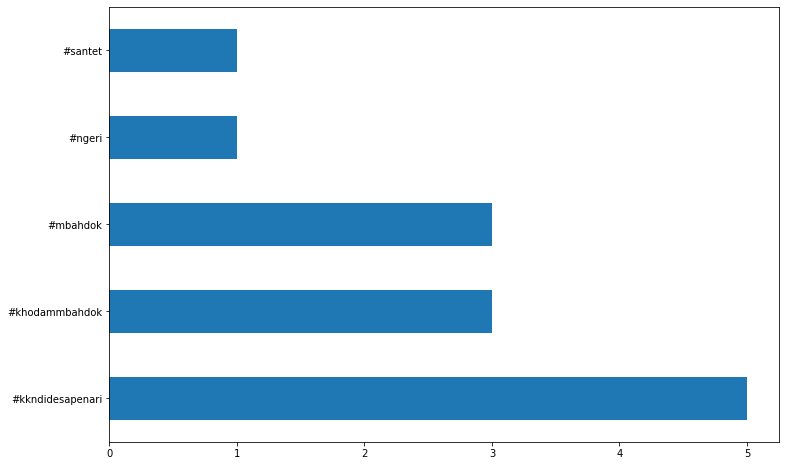

In [ ]:
N = 50 # Number of top frequent hashtags to be plotted

dtHT = [x for t in tqdm(HT['hashtags']) for x in t] # any(h not in x for h in HTfilters)
dtHT = pd.Series(dtHT)
dtHT = dtHT.value_counts()
dtHT = dtHT.sort_index()
dtHT = dtHT.sort_values(ascending = False) 
dtHT.to_csv('hashTags_2021.csv', encoding='utf8')
dtHT = dtHT.iloc[:N]

p = dtHT.plot(kind='barh', figsize=(12,8), legend = False)

### Hasil Analisis

Dari ketiga tempat yang telah di visualisasikan datanya, terlihat bahwa hastag 'kkndidesapenari' paling populer di Depok lalu Yogyakarta dan terakhir adalah Banyuwangi. Dari ketiga tempat tersebut banyak juga hastag populer yang didapatkan,  Depok memiliki jumlah terbanyak dan disusul oleh Yogyakarta dan Banyuwangi. Hal ini bisa saja dipengaruhi oleh jumlah pengguna twitter di daerah tersebut atau memang kepopuleran KKN di Desa Penari di daerah tersebut. Jika dilihat dari jumlah tweetsnya, hastag terkait KKN di Desa Penari kurang diminati pengguna twitter di daerah tersebut. Sementara Depok yang merupakan daerah perkotaan terlihat memiliki hastag-hastag populer yang lebih banyak jika dibandingkan dengan Banyuwangi dan Yogyakarta. Sementara Yogyakarya yang menjadi tempat shooting film tersebut popularitasnya dibawah popularitas KKN di Desa Penari di Depok sekitar 50%nya.

## **Visualisasi Data Text : Popular Words about KKN di Desa Penari**  

In [27]:
import tweepy
from textblob import TextBlob
from tweepy import OAuthHandler
import pandas as pd
import re
import time
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [28]:
authenticate = tweepy.OAuthHandler(Ck, Cs) 
authenticate.set_access_token(At, As) 
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [30]:
qry = 'KKN Desa Penari'
N = 1000# jumlah N tweet "terkini" yang ingin diambil
R = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    R.append(post)
    
"Done"

1000it [00:16, 61.91it/s]


'Done'

In [34]:
def keyword_to_csv(keyword,recent):
    try:
        tweets = tweepy.Cursor(api.search_tweets,q=keyword).items(recent) #creates query method
        tweets_list = [[tweet.text] for tweet in tweets] 
#pulls text information from tweets
        df = pd.DataFrame(tweets_list,columns=['Text']) 
#creates a pandas dataframe
        df.to_csv('{}.csv'.format(keyword), sep=',', index = False) 
 #creates a csv from data frame
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)
keyword = 'KKN Desa Penari'+ " -filter:retweets" #excludes retweets
recent  = 2000
keyword_to_csv(keyword, recent)

In [35]:
df = pd.read_csv("/content/KKN Desa Penari -filter:retweets.csv") #loads csv file into pandas dataframe
pd.options.display.max_colwidth = 200 
df.head() #prints out first few columns in a dataframe

,Text
0,Baru sempet nonton KKN di desa penari hari ini wkwkwkwk
1,padahal ada tari gandrung Banyuwangi yg lagi hits KKN Desa Penari https://t.co/NWbSGExklQ
2,kkn di desa penari https://t.co/JHehAVlWmY
3,Jd penisirin ini dimana sih aslinya kkn desa penari??\nCari di youtube banyak bener spekulasiny
4,tehe! cw // crossover kkn di desa penari \n\nbaju yae miko mirip badawuhi gak sih guys?


### **PRE-PROCESSING (Popular Words in Tweets)** 

In [36]:
df.shape #prints the shape of dataframe

(1195, 1)

In [38]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()
print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,1195): #3000 columns in our dataframe
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(i+1,3000))                                                                  
    cleaned_tweets.append(cleaning_tweets((df.Text[i])))

Cleaning the tweets...

Tweets 100 of 3000 have ben processed
Tweets 200 of 3000 have ben processed
Tweets 300 of 3000 have ben processed
Tweets 400 of 3000 have ben processed
Tweets 500 of 3000 have ben processed
Tweets 600 of 3000 have ben processed
Tweets 700 of 3000 have ben processed
Tweets 800 of 3000 have ben processed
Tweets 900 of 3000 have ben processed
Tweets 1000 of 3000 have ben processed
Tweets 1100 of 3000 have ben processed


In [39]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["Desa Penari","Pelangi","Ceritahorror","HTTPS", "ini", "itu", "gak", "nya","dengan"]) #adding our own stopwords

### **VISUALISASI DATA TEXT (Popular Words in Tweets)**

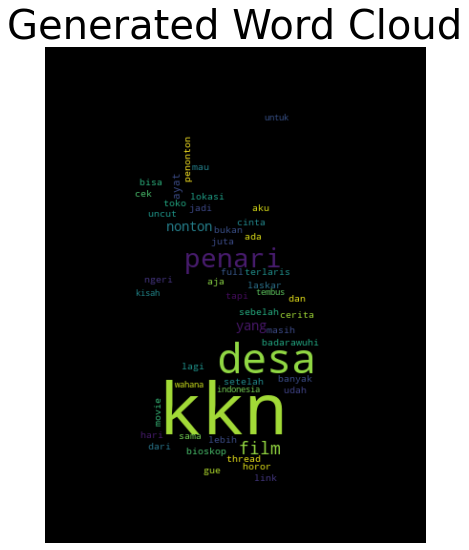

In [42]:
from PIL import Image
mask = np.array(Image.open('/content/hQLJwPKC-Silhouette-penari-bali-vector.png'))
wordcloud = WordCloud(width=1600, mask =   mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False).generate(string)
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.title('Original Image', size=40)
#plt.axis("off")
#f.add_subplot(1,2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Generated Word Cloud', size=40)
plt.axis("off")
plt.show()
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean'

Visualisasi di atas menunjukkan apa saja kata-kata yang paling sering digunakan dalam tweet yang berisikan tentang KKN di Desa Penari. Dari visualisasi tersebut terlihat bahwa 'kkn', 'desa', dan 'penari' adalah top 3 kata-kata yang paling sering muncul. Dari ketiga kata tersebut akan dibuat kembali visualisasi jumlah kata tersebut dalam setiap segmen datanya. (Data akan dibagi menjadi 10 segmen)

### 3 Most Popular Words Visualization 

In [43]:
df2 = pd.DataFrame(columns = ['Tweets', 'User', 'User_statuses_count', 
                             'user_followers', 'User_location', 'User_verified',
                             'fav_count', 'rt_count', 'tweet_date'])
search_words = "KKN Desa Penari"
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search_tweets
                               , q=data
                               , count=500
                               , lang='id').items():
        print(i, end='\r')
        df2.loc[i, 'Tweets'] = tweet.text
        df2.loc[i, 'User'] = tweet.user.name
        df2.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df2.loc[i, 'user_followers'] = tweet.user.followers_count
        df2.loc[i, 'User_location'] = tweet.user.location
        df2.loc[i, 'User_verified'] = tweet.user.verified
        df2.loc[i, 'fav_count'] = tweet.favorite_count
        df2.loc[i, 'rt_count'] = tweet.retweet_count
        df2.loc[i, 'tweet_date'] = tweet.created_at
        df2.to_csv('{}.csv'.format(file_name))
        i+=1
        if i == 1000:
            break
        else:
            pass

stream(data = search_words, file_name = 'my_tweets')
df2['tweet_date'] = df2.tweet_date.astype('datetime64')

df2['rt_count_cumulative'] = df2.rt_count.cumsum()
df2 = df2.sort_values(by='tweet_date',ascending=False)
df2['tweet_date'] = df2.tweet_date.dt.strftime('%m/%d/%y %H:%M')
df2.head(5)

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,rt_count_cumulative
0,Baru sempet nonton KKN di desa penari hari ini wkwkwkwk,phew phew,15505,515,sky,False,0,0,06/12/22 14:38,0
1,padahal ada tari gandrung Banyuwangi yg lagi hits KKN Desa Penari https://t.co/NWbSGExklQ,เหมย,42157,1330,"Depok, Jawa Barat",False,0,0,06/12/22 14:37,0
2,RT @pandji: Banyak amat film yg pengen gue tonton.\nNgeri Ngeri Sedap.\nSatria Dewa Gatot Kaca.\nKKN Di Desa Penari.\nTop Gun Maverick.,Reseller rindu,6528,57,,False,0,22,06/12/22 14:35,22
3,RT @jijiabaobei: konsep dia KKN Desa Penari https://t.co/4ikVepI99f,reen ༉₊˚✧๑՞,41939,100,,False,0,60,06/12/22 14:21,82
4,RT @SimpleM81378523: KKN di Desa penari-\n\nHorror Story-\n\n@bacahorror #bacahorror https://t.co/QM0zY8m9rj,Ihzanuha,85,22,DKI JAKARTA,False,0,75766,06/12/22 14:15,75848


#### Visualisasi Jumlah Data seperti Followers, Likes, RT, dll

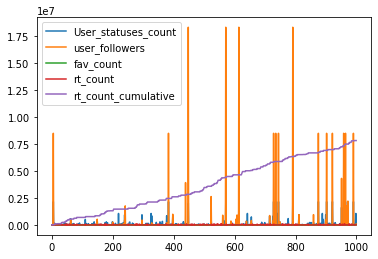

In [ ]:
df2.plot()

Visualisasi di atas menunjukkan jumlah data seperti jumlah tweets, followers, likes, dan retweet dari data yang diambil. Sumbu x menyatakan banyaknya data dan sumbu y menyatakan count data jumlah tweets, followers, likes, dan retweet dalam range 0,0 - 1e7. Bilangan-bilangan tersebut (di sumbu-y) merupakan hasil pembagian bilangan real dengan 1e7. 

#### Pre-Processing Data


In [44]:
# Pengambilan Data dan-atau Loading Data 
qry = "KKN Desa Penari"
tweetFile = '/content/TweetsKKNDesa.json'.format(qry)
try:
    data = tau.loadTweets(file=tweetFile)
    print("Local Data loaded, processing {} tweets.".format(len(data)))
except Exception as Err_:
    print("Local data not available, importing data directly from twitter ... ")
    api = tau.connect(key=(Ck, Cs, At, As))
    data = tau.crawlTwitter(api, qry, N=5000)
    tau1.saveTweets(data, file=tweetFile) # Save untuk lain waktu
    
tweets = [t['full_text'] for t in data] # Hanya mengambil tweeet saja untuk module ini.

Local data not available, importing data directly from twitter ... 
Welcome "Poi" you are now connected to twitter server
Crawling keyword "KKN Desa Penari"


1890it [00:08, 215.93it/s]


Collected 1890 tweets


In [45]:
stopId, lemmaId = tau.LoadStopWords(lang='id')
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')

cleaned_data = []
for tweet in tqdm(tweets):
    cleaned_data.append(tau.cleanText(tweet, lemma=lemmaId, lan='id', stops = stopId, fix=slangFixId))
    
cleaned_data[:7]

100%|██████████| 1890/1890 [05:23<00:00,  5.85it/s]


['nonton kkn desa tari wkwkwkwk',
 'tari gandrung banyuwangi hits kkn desa tari',
 'rt pandji film tonton seram seram sedap satria dewa gagal total kaca kkn desa tari top gun maverick',
 'rt jijiabaobei konsep kkn desa tari',
 'rt kkn desa tari horror story bacahorror bacahorror',
 'kkn desa tari',
 'penisirin mana sih asli kkn desa tari cari youtube spekulasiny']

In [46]:
# Save ke txt ... lalu nanti akan di upload ke Voyant Tools
filename = tweetFile.replace(".json", ".txt")
#tau.saveTweets(cleaned_data, file=filename, type_="plain")

"Tweets Saved: ".format(filename) # Silahkan cek di folder "Data", pindahkan ke Desktop untukk memudahkan tahap selanjutnya

'Tweets Saved: '

In [47]:
from unidecode import unidecode
# Save Raw tweet untuk mendapatkan konteks yang lebih baik
tweets = [unidecode(t) for t in tweets]
tau1.saveTweets(tweets, file=filename.replace(".txt", "_tweets.txt"), type_="plain")

#### Grafik Visualisasi

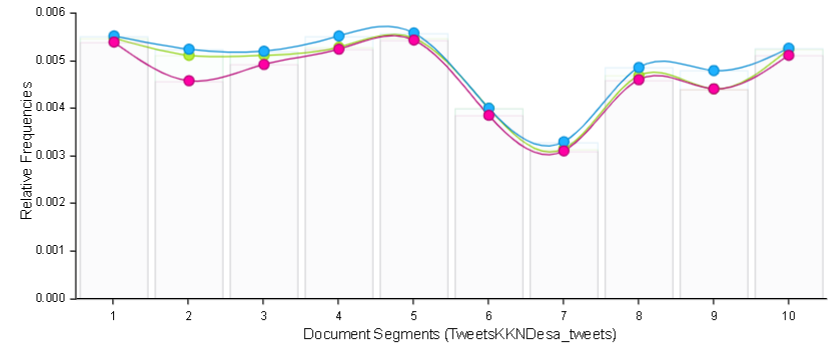

In [ ]:
#gambar di ambil dari voyant tools data nya dari preposs diatas
Gambar = Image.open('/content/desa kkn penari.png')
Gambar
#biru =  kkn , hijau = desa, penari = pink

Visualisasi di atas menunjukkan jumlah kata 'kkn', 'desa', dan 'penari' pada setiap segmen datanya. 
- Warna biru menunjukkan jumlah kata 'kkn'
- Warna hijau menunjukkan jumlah kata 'desa'
- Warna pink menunjukkan jumlah kata 'penari'

Sumbu x menyatakan setiap segmen datanya dan sumbu y menyatakan frekuensi relatif dengan satuan per 10 juta kata dalam data.

Karena data diambil berdasarkan tanggal, maka setiap segmen juga dibagi berdasarkan waktu rentang data ketika diambil.